Utkarsh Sachdeva (sid)
<br>
Date: Jan. 17, 2024
<br>
PHYS 2030 W24


## <center><font color=#46769B>Exercise 2: Normal distributions and the Central Limit Theorem</font></center>

__Rubric__ (100 points total):

- Part (a) /__20 points__
     
- Part (b) /__40 points__

- Part (c) /__40 points__


## <font color=#46769B>Introduction:</font>

First, in Part (a), we will deal with sampling from normal distributions. As in the lecture notes, you should use the function `numpy.random.normal()` to generate random numbers from a normal distribution.

Second, in Parts (b) and (c), we will perform two numerical tests of the Central Limit Theorem (CLT). Recall that Monte Carlo sampling is a way of estimating the true mean from an approximation computed from random numbers. The CLT tells us how close our estimate is *likely to be* to the true value. Namely, the difference between estimate and true value scales like $1/\sqrt{N}$ and so gets smaller as $N$ becomes larger.

Our goals for this notebook are:
- Gain familiarity with sampling from __normal distributions__
- Perform two numerical experiments to verify the __Central Limit Theorem__

Required reading:
- *Lesson 2: Normal Distribitions*

## <font color=#46769B>Part (a): Sampling from normal distributions</font>

Write a code that performs the following tasks:

- Generate $N = 10^4$ samples for $x$ from $\mathcal{N}(\mu,\sigma)$, where $\mu = 3$ and $\sigma = 1$.

- Calculate and print the mean $\langle x \rangle$ and standard deviation $\Delta x$, and compare to $\mu$ and $\sigma$.

- Make a histogram plot for your samples for $x$ using `matplotlib.pyplot.hist()`.

- On the same plot, plot the normal PDF $\mathcal{N}(\mu,\sigma)$ as a function of $x$.

Be sure that your $x$-axis is labeled, you include a legend, the number of bins is chosen appropriately, and that you have normalized the histogram correctly so that your PDF and histogram are in good agreement.

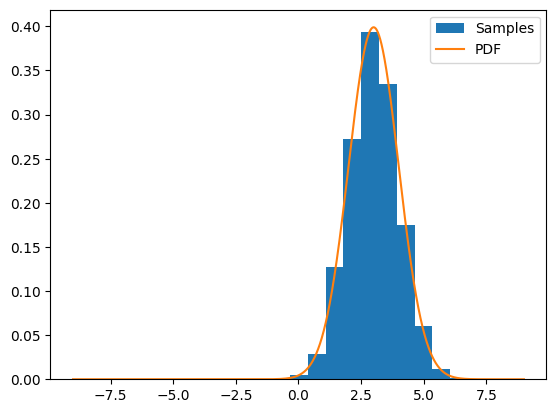

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


mu = 3
sigma = 1
num = 10**4
x = np.random.normal(mu, sigma, num)
plt.hist(x, density = True, label = "Samples",)

x = np.linspace(-9,9, num)
N = 1/(np.sqrt(2*(np.pi)*sigma**2)) * np.exp(-0.5* (x-mu)**2/sigma**2)
plt.plot(x, N, label = "PDF")

plt.legend()
plt.show()


## <font color=#46769B>Part (b): Testing the CLT with flipping a coin</font>

Define a function `coin_flip(num)` that flips a coin $N$ (here $N$ is the same as `num`) times, with probability $p=0.3$ for heads ($x=1$) and probability $1-p=0.7$ for tails ($x=0$), and returns $\langle x \rangle$.

Perform the $N=1000$ coin flip experiment a total of 1000 times and make a list `means` of the 1000 results. That is, you perform the simulation 1000 times and *each simulation* has $N=1000$ coin flips. Perform the following tasks:

- Make a histogram of your results for `means` using `matplotlib.pyplot.hist()`

- On the same plot, use `matplotlib.pyplot.plt()` to plot a Gaussian curve centered at $\mu$ and with width $\sigma/\sqrt{N}$, where $\mu$ and $\sigma$ are the true mean and standard deviation of Bernoulli distribution. Note that you are not plotting $\mathcal{N}(\mu,\sigma)$ as a function of $x$, you are plotting $\mathcal{N}(\mu,\sigma/\sqrt{N})$ as a function of $x$.

Next, repeat these steps with $N=10,000$ and plot your results on the same plot above.

You should see:

- How the distribution of means from the coin flip agrees well with a normal distribution (even though a Bernoulli distribution is not related at all to a normal distribution).

- How the distribution of means narrows (gets more accurate) as $N$ increases

For your plot, be sure to:

- Set `alpha=0.5` so you can see all histograms clearly. Choose a suitable number of bins.

- Include an $x$-axis label and a legend.

- Normalize your histograms so they agree with your Gaussian curves.




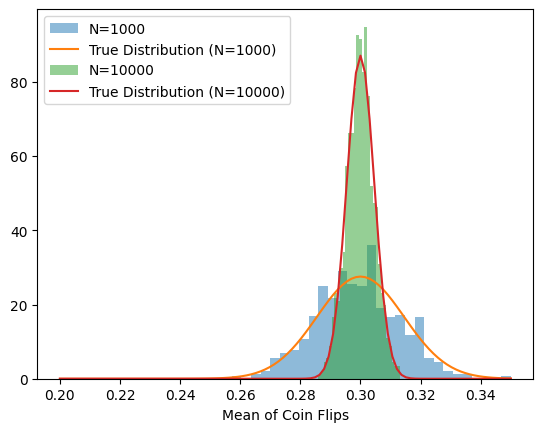

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def coin_flip(num, probability):
    flips = np.random.choice([0, 1], size=num, p=[1 - probability, probability])
    return np.mean(flips)

def calculate_gaussian(x, true_mean, true_std):
    return np.exp(-(x - true_mean)**2 / (2 * true_std**2)) / (np.sqrt(2 * np.pi * true_std**2))

def plot_coin_flip_distribution(N, probability):

    num_simulations = 1000
    means = [coin_flip(N, probability) for _ in range(num_simulations)]


    plt.hist(means, bins=30, alpha=0.5, density=True, label=f'N={N}')


    true_mean = probability
    true_std = np.sqrt(true_mean * (1 - true_mean) / N)


    x = np.linspace(0.2, 0.35, 100)
    y = calculate_gaussian(x, true_mean, true_std)
    plt.plot(x, y, label=f'True Distribution (N={N})')

plot_coin_flip_distribution(1000, 0.3)

plot_coin_flip_distribution(10000, 0.3)




plt.xlabel('Mean of Coin Flips')
plt.legend()

plt.show()






## <font color=#46769B>Part (c): Testing the CLT with a uniform distribution</font>

Define a function `sample_uniform(num)` that will generate $N$ samples for $x$ from a uniform distribution within the range $[0,2]$ and returns $\langle x \rangle$.

Now, repeat all the steps of Part (b). (Note that the true mean $\mu$ and standard deviation $\sigma$ will be different from Part (b). You can find formulas for $\mu$, $\sigma$ for a uniform distribution in Lecture Notes 2.)

As in Part (b), you should find:

- How the distribution of means for $x$ agrees well with a normal distribution (even though a uniform distribution is not related at all to a normal distribution).

- How the distribution of means narrows (gets more accurate) as $N$ increases


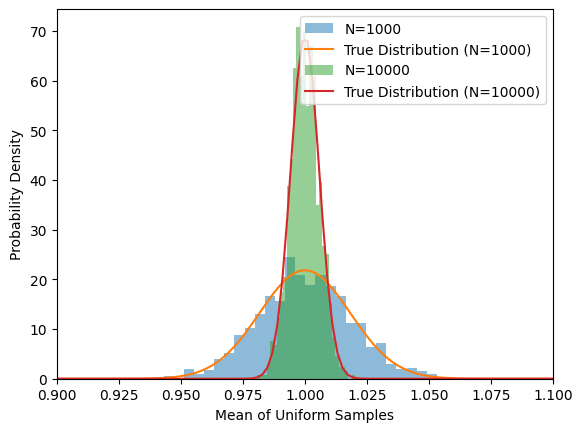

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_uniform(num):
    samples = np.random.uniform(low=0, high=2, size=num)
    return np.mean(samples)

def plot_uniform_distribution(N):
    num_simulations = 1000
    means = [sample_uniform(N) for _ in range(num_simulations)]

    plt.hist(means, bins=30, alpha=0.5, density=True, label=f'N={N}')

    true_mean = 1
    true_std = np.sqrt(1 / 3)

    x = np.linspace(0.9, 1.1, 100)
    y = np.exp(-(x - true_mean)**2 / (2 * (true_std / np.sqrt(N))**2)) / (np.sqrt(2 * np.pi * (true_std / np.sqrt(N))**2))
    plt.plot(x, y, label=f'True Distribution (N={N})')

plt.xlabel('Mean of Uniform Samples')
plt.ylabel('Probability Density')
plt.xlim(0.9,1.1)



# Plot for N=1000
plot_uniform_distribution(1000)

# Plot for N=10000
plot_uniform_distribution(10000)
plt.legend()
plt.show()